<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: *Ueliton Moreira Rocha.*

**ANTES DE PROSSEGUIR FAÇA UMA CÓPIA DESTE NOTEBOOK**

----

## Contexto

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Importação do dataset e das bibliotecas

In [54]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
!gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

Downloading...
From: https://drive.google.com/uc?id=1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr
To: /content/ITL-SI10-2024-P1-dataset.csv
100% 7.03k/7.03k [00:00<00:00, 18.3MB/s]


In [55]:
# Importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
print(df.head())

         Data  Visitantes Únicos  Sessões  Taxa de Rejeição (%)  \
0  2023-01-01              113.0    126.0             50.496714   
1  2023-01-02               90.0    157.0             49.438007   
2  2023-01-03               92.0    185.0             49.800231   
3  2023-01-04              130.0    206.0             50.251843   
4  2023-01-05              123.0    155.0             48.070931   

   Páginas por Sessão Principais Origens do Tráfego Dispositivos  Eventos  \
0            1.834201                        Direto      Desktop        8   
1            1.955760                        Social      Desktop        5   
2            2.285052                        Direto      Desktop        9   
3            2.325464                          Pago       Mobile        6   
4            2.267006                        Direto      Desktop        6   

   Taxa de Conversão (%)  Tempo Médio de Sessão (minutos)  
0               1.952083                         5.395516  
1             

## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

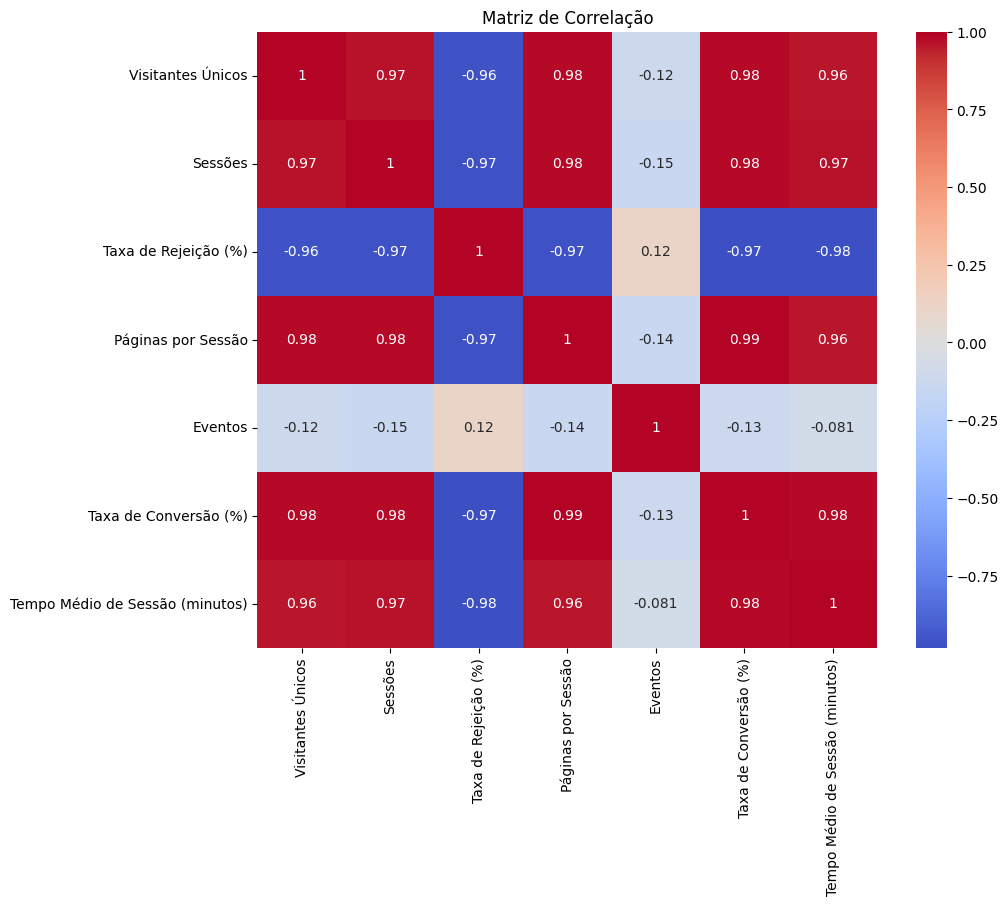

In [56]:
numeric_columns = ['Visitantes Únicos', 'Sessões', 'Taxa de Rejeição (%)', 'Páginas por Sessão',
                   'Eventos', 'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)']

for col in numeric_columns:
    fig = px.histogram(df, x=col, title=f'Distribuição de {col}')
    fig.show()

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

for col in numeric_columns:
    if col != 'Taxa de Conversão (%)':
        fig = px.scatter(df, x=col, y='Taxa de Conversão (%)', title=f'Relação entre {col} e Taxa de Conversão (%)')
        fig.show()


### Questão 2

**Simulação de Monte Carlo**: Implemente uma simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma. Analise como diferentes variáveis podem impactar os resultados e discuta os cenários que esta simulação pode prever, ajudando a empresa a tomar decisões mais informadas sobre o redesign.

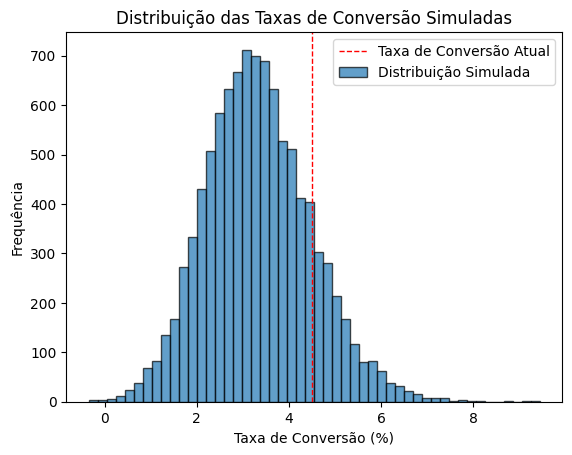

Taxa de Conversão Atual: 4.50%
Taxa de Conversão Simulada Média: 3.33%
Desvio Padrão da Taxa de Conversão Simulada: 1.15%

Cenários Previstos:
Cenário Otimista (95º Percentil): 5.29%
Cenário Pessimista (5º Percentil): 1.58%


In [57]:
n_simulations = 10000
current_rejection_rate_mean = df['Taxa de Rejeição (%)'].mean()
current_rejection_rate_std = df['Taxa de Rejeição (%)'].std()
current_session_duration_mean = df['Tempo Médio de Sessão (minutos)'].mean()
current_session_duration_std = df['Tempo Médio de Sessão (minutos)'].std()
current_conversion_rate_mean = df['Taxa de Conversão (%)'].mean()

# melhora de 5% na taxa de rejeição e aumento de 10% no tempo de sessão)
rejection_rate_improvement = 0.05
session_duration_increase = 0.10

def simulate_conversion_rate(n_simulations, rejection_rate_mean, rejection_rate_std, session_duration_mean, session_duration_std, conversion_rate_mean):
    simulated_rejection_rates = np.random.normal(rejection_rate_mean * (1 - rejection_rate_improvement), rejection_rate_std, n_simulations)
    simulated_session_durations = np.random.normal(session_duration_mean * (1 + session_duration_increase), session_duration_std, n_simulations)

    simulated_conversion_rates = conversion_rate_mean * (1 - (simulated_rejection_rates / 100)) * (simulated_session_durations / session_duration_mean)

    return simulated_conversion_rates

simulated_conversion_rates = simulate_conversion_rate(n_simulations, current_rejection_rate_mean, current_rejection_rate_std, current_session_duration_mean, current_session_duration_std, current_conversion_rate_mean)

plt.hist(simulated_conversion_rates, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribuição das Taxas de Conversão Simuladas')
plt.xlabel('Taxa de Conversão (%)')
plt.ylabel('Frequência')
plt.axvline(current_conversion_rate_mean, color='r', linestyle='dashed', linewidth=1)
plt.legend(['Taxa de Conversão Atual', 'Distribuição Simulada'])
plt.show()


mean_simulated_conversion_rate = np.mean(simulated_conversion_rates)
std_simulated_conversion_rate = np.std(simulated_conversion_rates)
print(f"Taxa de Conversão Atual: {current_conversion_rate_mean:.2f}%")
print(f"Taxa de Conversão Simulada Média: {mean_simulated_conversion_rate:.2f}%")
print(f"Desvio Padrão da Taxa de Conversão Simulada: {std_simulated_conversion_rate:.2f}%")


print("\nCenários Previstos:")
print(f"Cenário Otimista (95º Percentil): {np.percentile(simulated_conversion_rates, 95):.2f}%")
print(f"Cenário Pessimista (5º Percentil): {np.percentile(simulated_conversion_rates, 5):.2f}%")


### Questão 3

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

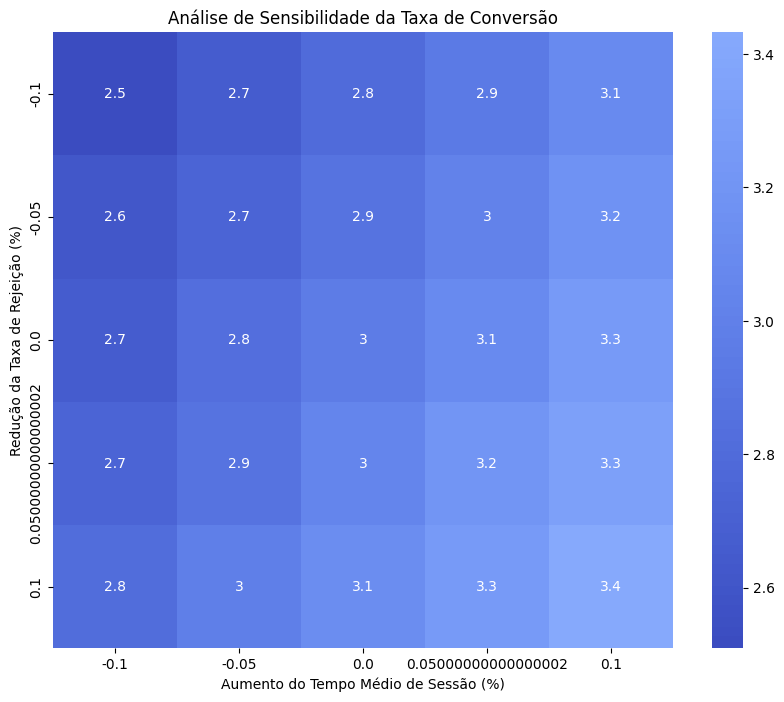


Cenários Extremos:
    Rejection Rate Improvement  Session Duration Increase  \
0                        -0.10                      -0.10   
1                        -0.10                      -0.05   
2                        -0.10                       0.00   
3                        -0.10                       0.05   
4                        -0.10                       0.10   
5                        -0.05                      -0.10   
9                        -0.05                       0.10   
10                        0.00                      -0.10   
14                        0.00                       0.10   
15                        0.05                      -0.10   
19                        0.05                       0.10   
20                        0.10                      -0.10   
21                        0.10                      -0.05   
22                        0.10                       0.00   
23                        0.10                       0.05   
24  

In [58]:
def simulate_conversion_rate(n_simulations, rejection_rate_mean, rejection_rate_std, session_duration_mean, session_duration_std, conversion_rate_mean, rejection_rate_improvement, session_duration_increase):
    simulated_rejection_rates = np.random.normal(rejection_rate_mean * (1 - rejection_rate_improvement), rejection_rate_std, n_simulations)
    simulated_session_durations = np.random.normal(session_duration_mean * (1 + session_duration_increase), session_duration_std, n_simulations)


    simulated_conversion_rates = conversion_rate_mean * (1 - (simulated_rejection_rates / 100)) * (simulated_session_durations / session_duration_mean)

    return simulated_conversion_rates


results = []

for r_variation in rejection_rate_variation:
    for s_variation in session_duration_variation:
        simulated_conversion_rates = simulate_conversion_rate(n_simulations, current_rejection_rate_mean, current_rejection_rate_std, current_session_duration_mean, current_session_duration_std, current_conversion_rate_mean, r_variation, s_variation)
        mean_conversion_rate = np.mean(simulated_conversion_rates)
        results.append((r_variation, s_variation, mean_conversion_rate))


results_df = pd.DataFrame(results, columns=['Rejection Rate Improvement', 'Session Duration Increase', 'Mean Conversion Rate'])


results_pivot = results_df.pivot(index='Rejection Rate Improvement', columns='Session Duration Increase', values='Mean Conversion Rate')


plt.figure(figsize=(10, 8))
sns.heatmap(results_pivot, annot=True, cmap='coolwarm', center=current_conversion_rate_mean)
plt.title('Análise de Sensibilidade da Taxa de Conversão')
plt.xlabel('Aumento do Tempo Médio de Sessão (%)')
plt.ylabel('Redução da Taxa de Rejeição (%)')
plt.show()

extreme_scenarios = results_df.loc[
    (results_df['Rejection Rate Improvement'] == rejection_rate_variation.min()) |
    (results_df['Rejection Rate Improvement'] == rejection_rate_variation.max()) |
    (results_df['Session Duration Increase'] == session_duration_variation.min()) |
    (results_df['Session Duration Increase'] == session_duration_variation.max())
]

print("\nCenários Extremos:")
print(extreme_scenarios)


## Entrega

Siga esses passos para entregar sua prova.

1. Crie um repositório no GitHub para essa entrega.

2. Submeta seu desenvolvimento neste repositório.

3. Garanta que o repositório é publicamente acessível (eliminatório).

4. No Google forms da prova, submeta a URL do repositório.